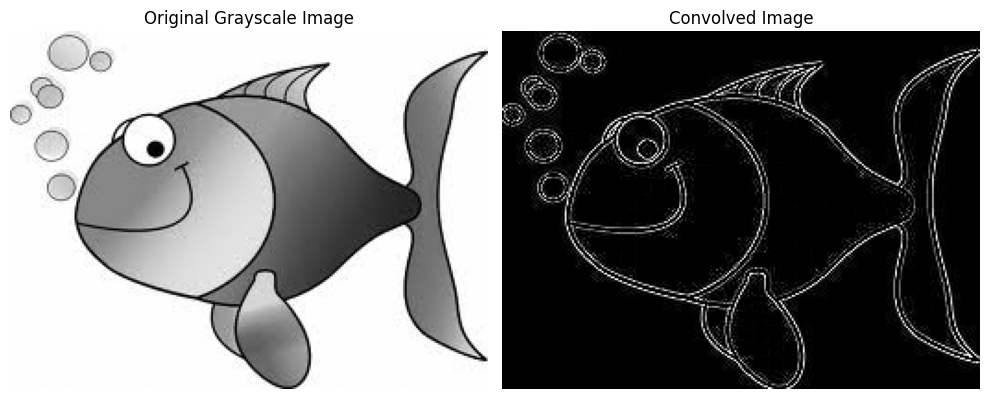

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def load_grayscale_image(path):
    """Load image and convert to grayscale numpy array"""
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)


def apply_convolution(image, kernel):
    """Apply 3x3 convolution manually"""
    height, width = image.shape
    output = np.zeros_like(image, dtype=np.float64)

    # Pad image to handle borders
    padded = np.pad(image, pad_width=1, mode="edge")

    # Loop over every pixel
    for i in range(height):
        for j in range(width):
            region = padded[i : i + 3, j : j + 3]
            output[i, j] = np.sum(region * kernel)

    # Normalize to 0–255 range
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


def main():
    image_path = "stdimgs/HappyFish.jpg"  # replace with your image
    image = load_grayscale_image(image_path)

    # Example 3x3 kernel (Edge detection - simple Laplacian)
    kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

    convolved = apply_convolution(image, kernel)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Convolved Image")
    plt.imshow(convolved, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()